In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("austo_automobile.csv")

## A: An Overview of the dataset : Important technical information

In [3]:
df.shape

(1581, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [5]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [6]:
df.head().T

,0,1,2,3,4
Age,53,53,53,53,53
Gender,Male,Femal,Female,Female,Male
Profession,Business,Salaried,Salaried,Salaried,Salaried
Marital_status,Married,Married,Married,Married,Married
Education,Post Graduate,Post Graduate,Post Graduate,Graduate,Post Graduate
No_of_Dependents,4,4,3,2,3
Personal_loan,No,Yes,No,Yes,No
House_loan,No,No,No,No,No
Partner_working,Yes,Yes,Yes,Yes,Yes
Salary,99300,95500,97300,72500,79700


In [7]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=1581, step=1)

## B: Preliminary findings and their treatments

In [9]:
print("Total Duplicate values : ",df.duplicated().sum())

Total Duplicate values :  0


In [10]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [11]:
df["Gender"].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [12]:
df.Gender=df.Gender.replace(["Femal","Femle"], ["Female","Female"])          # Spelling Error corrected

In [13]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
df.groupby("Gender")["Gender"].count()

Gender
Female     329
Male      1199
Name: Gender, dtype: int64

In [15]:
df.Gender=df.Gender.fillna("Male")                              # nan values replaced with Male

In [16]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df.groupby("Gender")["Gender"].count()

Gender
Female     329
Male      1252
Name: Gender, dtype: int64

In [18]:
df.Gender.value_counts()

Gender
Male      1252
Female     329
Name: count, dtype: int64

In [19]:
df["Profession"].unique()

array(['Business', 'Salaried'], dtype=object)

In [20]:
df.groupby("Profession")["Profession"].count()

Profession
Business    685
Salaried    896
Name: Profession, dtype: int64

In [21]:
df.Profession.value_counts()

Profession
Salaried    896
Business    685
Name: count, dtype: int64

In [22]:
df["Marital_status"].unique()

array(['Married', 'Single'], dtype=object)

In [23]:
df.groupby("Marital_status")["Marital_status"].count()

Marital_status
Married    1443
Single      138
Name: Marital_status, dtype: int64

In [24]:
df.Marital_status.value_counts()

Marital_status
Married    1443
Single      138
Name: count, dtype: int64

In [25]:
df["No_of_Dependents"].unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [26]:
df.No_of_Dependents.value_counts()

No_of_Dependents
3    557
2    557
1    229
4    218
0     20
Name: count, dtype: int64

In [27]:
df["Education"].unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [28]:
df.Education.value_counts()

Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64

In [29]:
df["Personal_loan"].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
df.Personal_loan.value_counts()

Personal_loan
Yes    792
No     789
Name: count, dtype: int64

In [31]:
df["House_loan"].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df.House_loan.value_counts()

House_loan
No     1054
Yes     527
Name: count, dtype: int64

In [33]:
df["Partner_working"].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
df.Partner_working.value_counts()

Partner_working
Yes    868
No     713
Name: count, dtype: int64

In [35]:
df["Make"].unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

In [36]:
df.Make.value_counts()

Make
Sedan        702
Hatchback    582
SUV          297
Name: count, dtype: int64

In [37]:
# Steps to check connection between Salary, Partner_salary and Total_salary.

In [38]:
sal=df[df["Partner_salary"].notnull()][["Salary","Partner_salary","Total_salary"]]

In [39]:
sal

,Salary,Partner_salary,Total_salary
0,99300,70700.0,170000
1,95500,70300.0,165800
2,97300,60700.0,158000
3,72500,70300.0,142800
4,79700,60200.0,139900
...,...,...,...
1574,34700,0.0,34700
1575,34000,0.0,34000
1576,33300,0.0,33300
1578,32900,0.0,32900


In [40]:
print("Is Salary + Partner_salary = Total_salary ? ",(sal["Salary"]+sal["Partner_salary"]==sal["Total_salary"]).unique())

Is Salary + Partner_salary = Total_salary ?  [ True]


In [41]:
df.Partner_salary=df.apply(lambda row: (row["Total_salary"]-row["Salary"]) if np.isnan(row["Partner_salary"])
                                                                               else row["Partner_salary"],axis=1)

In [42]:
print("Total Null values in Partner_salary : ",df["Partner_salary"].isnull().sum())

Total Null values in Partner_salary :  0


In [43]:
df.isnull().sum()                  # null values checked after corrections

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [44]:
# Statistical Analysis of the data

In [45]:
test_df=pd.DataFrame(df.describe().T.drop(columns="count"))

In [46]:
test_df

,mean,std,min,25%,50%,75%,max
Age,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,19233.776091,19670.391171,0.0,0.0,25100.0,38100.0,80500.0
Total_salary,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


## C: Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

<Axes: xlabel='Gender', ylabel='count'>

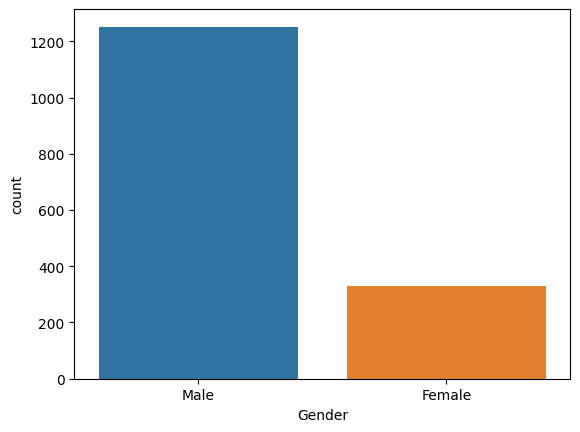

In [47]:
sns.countplot(df,x="Gender")

<Axes: xlabel='Profession', ylabel='count'>

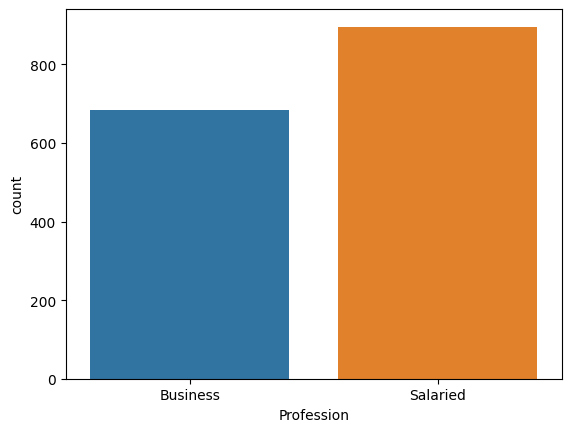

In [48]:
sns.countplot(df,x="Profession")

<Axes: xlabel='Marital_status', ylabel='count'>

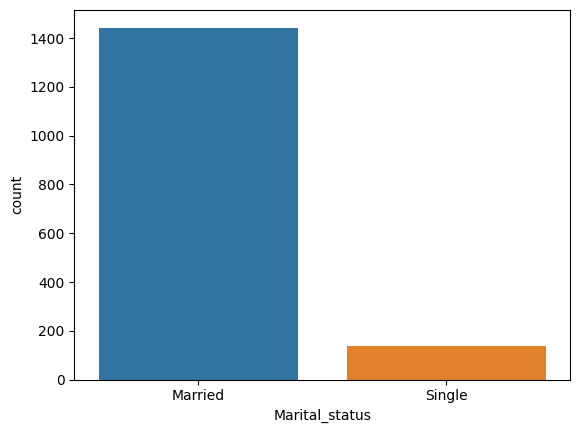

In [49]:
sns.countplot(df,x="Marital_status")

<Axes: xlabel='Education', ylabel='count'>

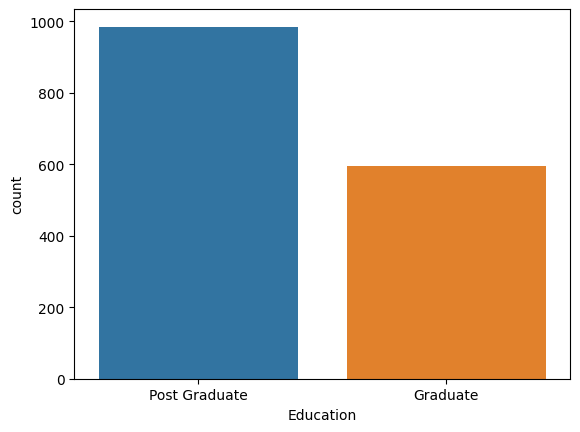

In [50]:
sns.countplot(df,x="Education")

<Axes: xlabel='No_of_Dependents', ylabel='count'>

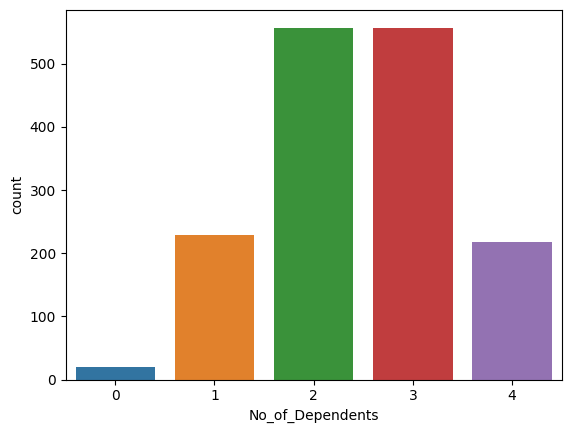

In [51]:
sns.countplot(df,x="No_of_Dependents")

<Axes: xlabel='Personal_loan', ylabel='count'>

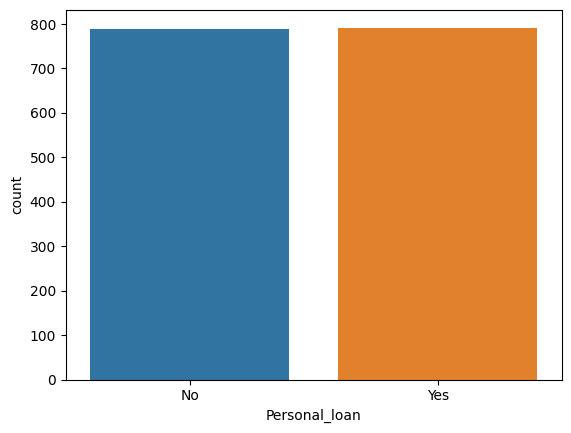

In [52]:
sns.countplot(df,x="Personal_loan")

<Axes: xlabel='House_loan', ylabel='count'>

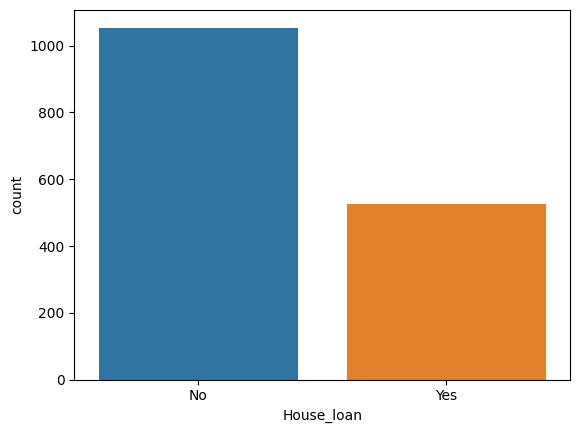

In [53]:
sns.countplot(df,x="House_loan")

<Axes: xlabel='Partner_working', ylabel='count'>

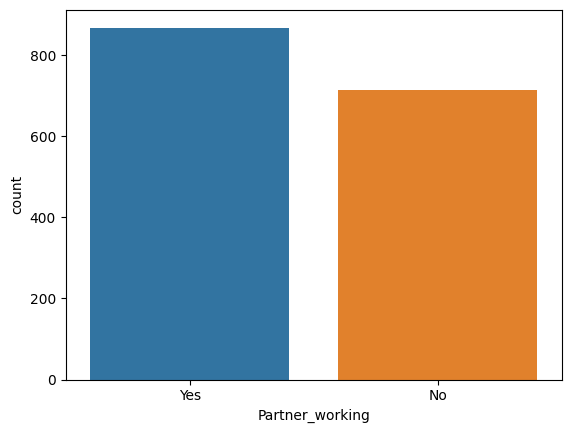

In [54]:
sns.countplot(df,x="Partner_working")

<Axes: xlabel='Make', ylabel='count'>

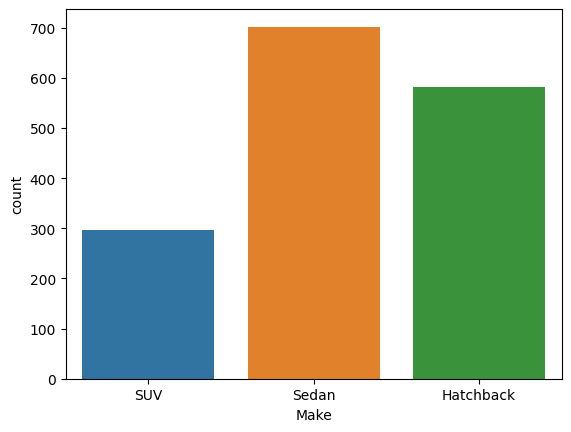

In [55]:
sns.countplot(df,x="Make")

<Axes: xlabel='Marital_status', ylabel='count'>

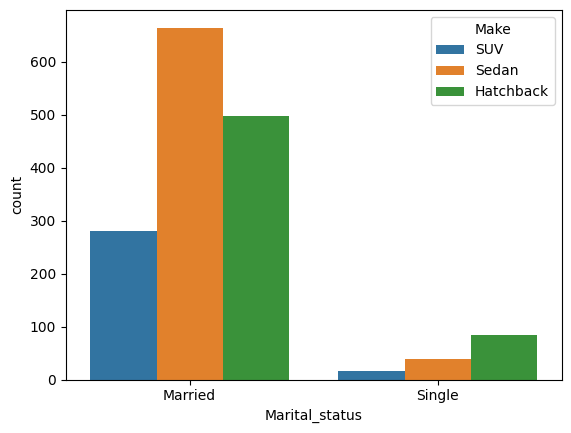

In [56]:
sns.countplot(df,x="Marital_status",hue = "Make")                        # graph not used in report

<Axes: xlabel='Gender', ylabel='count'>

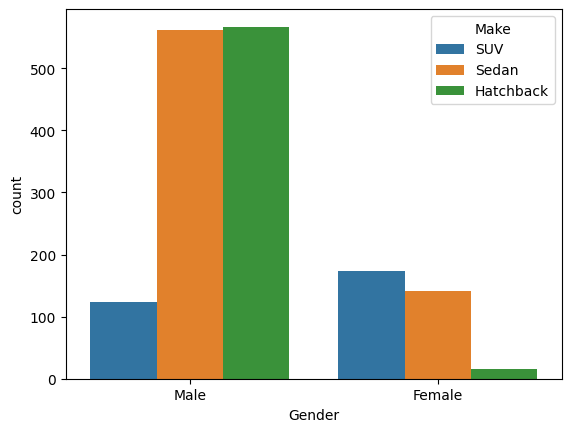

In [57]:
sns.countplot(df, x ="Gender", hue = "Make")                        # graph not used in report

In [58]:
Total_Revenue=df.groupby(["Make"])["Price"].sum()

In [59]:
Total_Revenue

Make
Hatchback    15408000
SUV          16580000
Sedan        24292000
Name: Price, dtype: int64

In [60]:
print("Total_Revenue")

Total_Revenue


<Axes: >

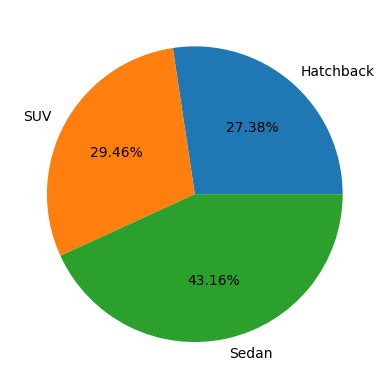

In [61]:
Total_Revenue.plot.pie(ylabel="", autopct="%2.2f%%")

## D: Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data.

C:\Users\Saurabh Arya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


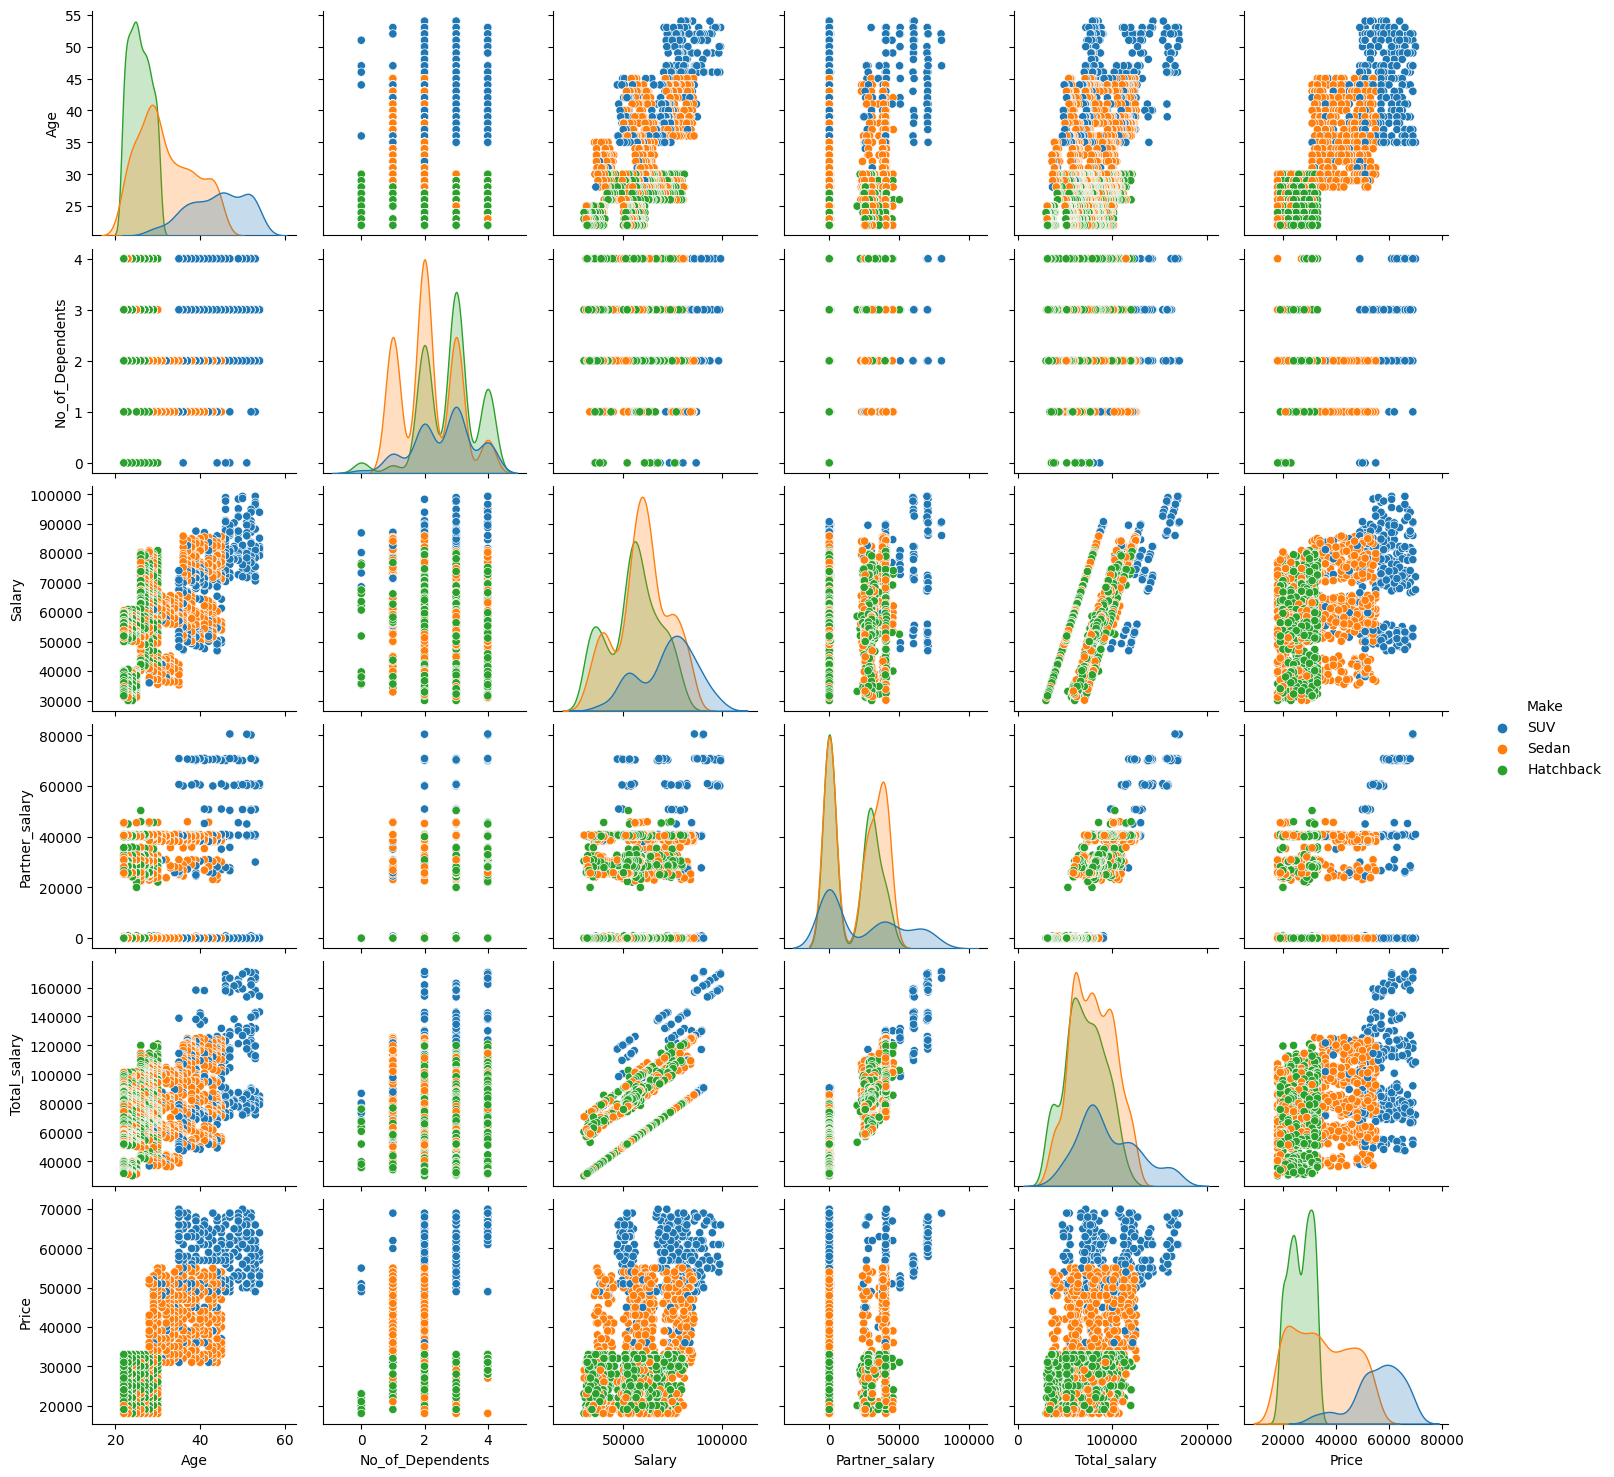

In [62]:
sns.pairplot(df,hue="Make")                        # graph not used in report

In [63]:
sns.relplot

<function seaborn.relational.relplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)>

C:\Users\Saurabh Arya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


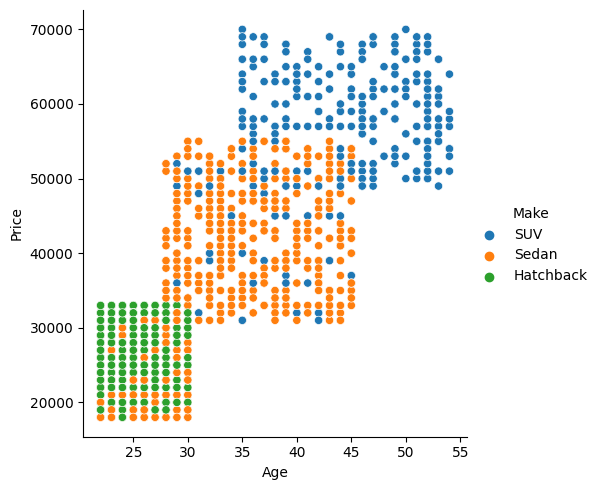

In [64]:
sns.relplot(df, x="Age", y="Price", kind="scatter", hue="Make")

In [65]:
df["Age"].min()

22

In [66]:
df["Salary"].min()

30000

C:\Users\Saurabh Arya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


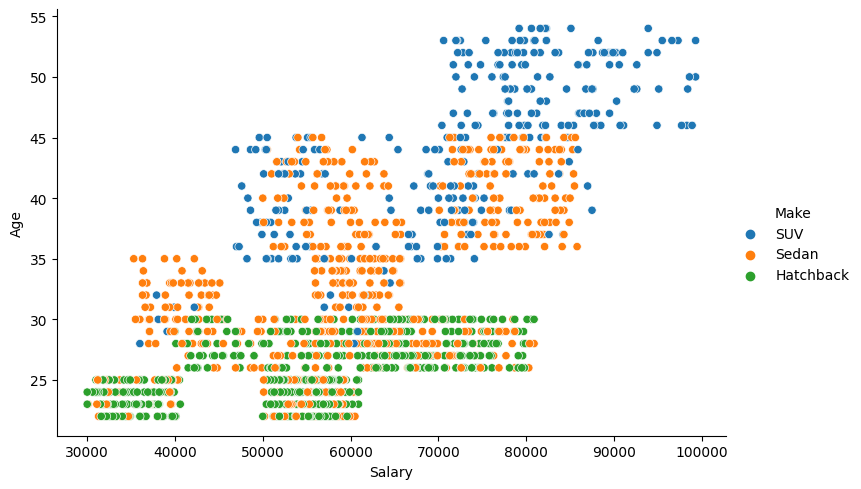

In [67]:
sns.relplot(df, y="Age", x="Salary", kind="scatter", hue="Make",aspect=1.5)                     # graph not used in report

C:\Users\Saurabh Arya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


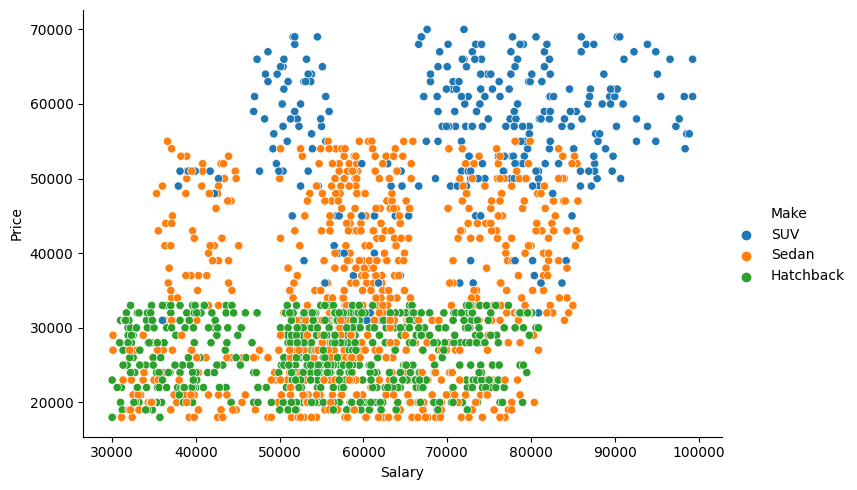

In [68]:
sns.relplot(df, x="Salary", y="Price", kind="scatter", hue="Make", aspect=1.5)

C:\Users\Saurabh Arya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


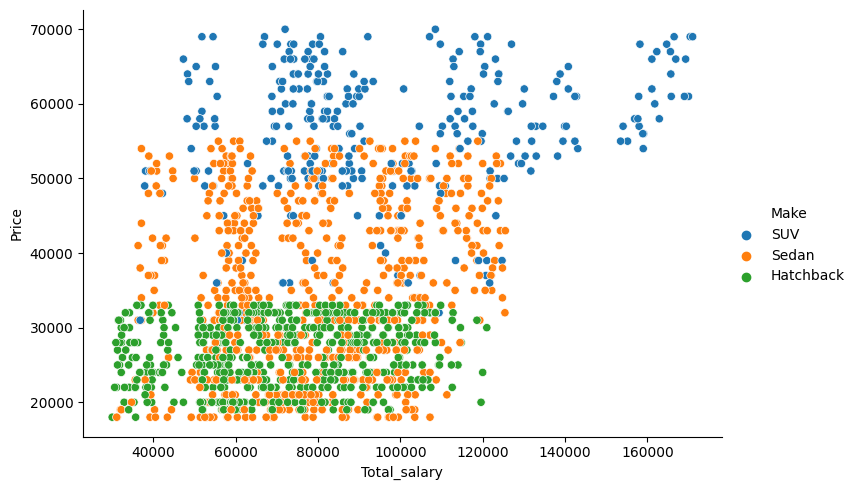

In [69]:
sns.relplot(df, x="Total_salary", y="Price", kind="scatter", hue="Make", aspect = 1.5)

C:\Users\Saurabh Arya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


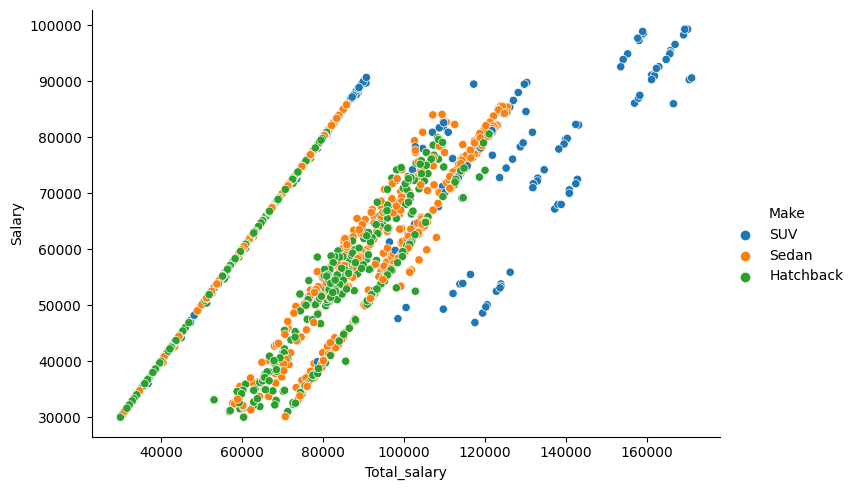

In [70]:
sns.relplot(df, x="Total_salary", y="Salary", kind="scatter", hue="Make", aspect = 1.5)

C:\Users\Saurabh Arya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


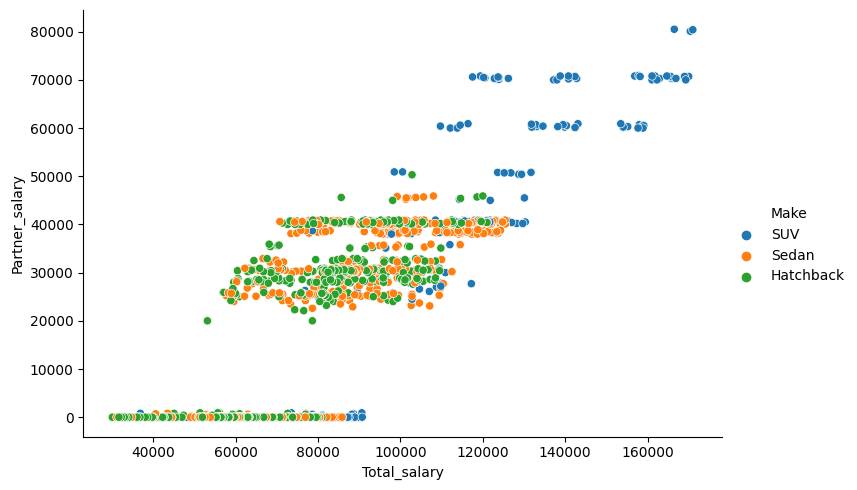

In [71]:
sns.relplot(df, x="Total_salary", y="Partner_salary", kind="scatter", hue="Make", aspect = 1.5)       # graph not used in report

## E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”.

In [72]:
df.groupby("Gender")["Gender"].count()

Gender
Female     329
Male      1252
Name: Gender, dtype: int64

In [73]:
df.groupby(["Gender","Make"])["Make"].count()

Gender  Make     
Female  Hatchback     15
        SUV          173
        Sedan        141
Male    Hatchback    567
        SUV          124
        Sedan        561
Name: Make, dtype: int64

In [74]:
MaleD=df[["Gender","Make"]].where(df["Gender"]=="Male")

In [75]:
MaleD.groupby(["Gender","Make"])["Make"].count()

Gender  Make     
Male    Hatchback    567
        SUV          124
        Sedan        561
Name: Make, dtype: int64

In [76]:
MaleD.groupby("Make").count().rename(columns={"Gender":"Male"})

,Male
Make,
Hatchback,567
SUV,124
Sedan,561


In [77]:
MaleD.count()

Gender    1252
Make      1252
dtype: int64

In [78]:
FemaleD=df[["Gender","Make"]].where(df["Gender"]=="Female")

In [79]:
FemaleD.count()

Gender    329
Make      329
dtype: int64

In [80]:
sample1=(MaleD.sample(400).groupby("Make").count()).rename(columns={"Gender":"Male"})

In [81]:
sample2=(MaleD.sample(400).groupby("Make").count()).rename(columns={"Gender":"Male"})

In [82]:
sample3=(MaleD.sample(400).groupby("Make").count()).rename(columns={"Gender":"Male"})

In [83]:
sample1

,Male
Make,
Hatchback,143
SUV,29
Sedan,136


In [84]:
sample2

,Male
Make,
Hatchback,145
SUV,27
Sedan,149


In [85]:
sample3

,Male
Make,
Hatchback,132
SUV,32
Sedan,153


In [86]:
SUVMale=[sample1.iloc[1][0],sample2.iloc[1][0],sample3.iloc[1][0]]

In [87]:
FmD=(FemaleD.groupby("Make").count()).rename(columns={"Gender":"Female"})

In [88]:
FmD

,Female
Make,
Hatchback,15
SUV,173
Sedan,141


In [89]:
SUVFemale=[FmD.iloc[1][0],FmD.iloc[1][0],FmD.iloc[1][0]]

In [90]:
df1=pd.DataFrame({"Male":SUVMale,"Female":SUVFemale},index=["SUV_Sample1","SUV_Sample2","SUV_Sample3"])

<Axes: >

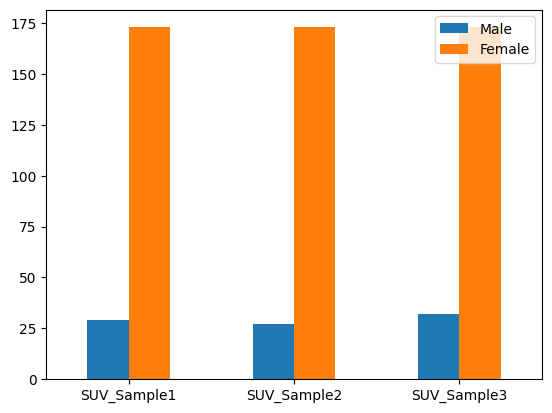

In [91]:
df1.plot.bar(rot=0)

In [92]:
HBMale=[sample1.iloc[0][0],sample2.iloc[0][0],sample3.iloc[0][0]]

In [93]:
HBFemale=[FmD.iloc[0][0],FmD.iloc[0][0],FmD.iloc[0][0]]

In [94]:
df2=pd.DataFrame({"Male":HBMale,"Female":HBFemale},index=["HB_Sample1","HB_Sample2","HB_Sample3"])

<Axes: >

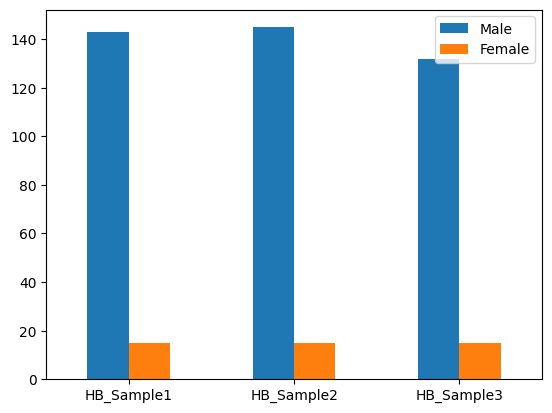

In [95]:
df2.plot.bar(rot=0)

In [96]:
SEDMale=[sample1.iloc[2][0],sample2.iloc[2][0],sample3.iloc[2][0]]

In [97]:
SEDFemale=[FmD.iloc[2][0],FmD.iloc[2][0],FmD.iloc[2][0]]

In [98]:
df3=pd.DataFrame({"Male":SEDMale,"Female":SEDFemale},index=["SED_Sample1","SED_Sample2","SED_Sample3"])

<Axes: >

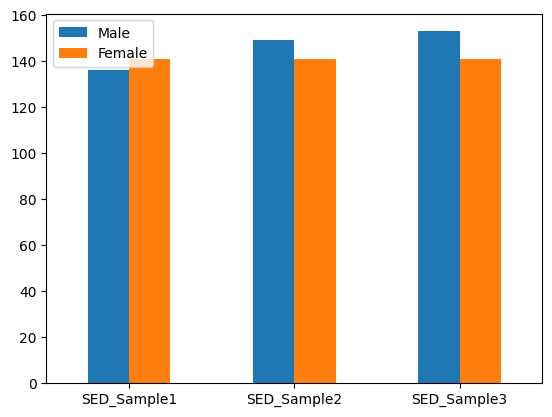

In [99]:
df3.plot.bar(rot=0)

## E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

In [100]:
df.groupby(["Profession","Make"])["Make"].count()

Profession  Make     
Business    Hatchback    290
            SUV           89
            Sedan        306
Salaried    Hatchback    292
            SUV          208
            Sedan        396
Name: Make, dtype: int64

<Axes: xlabel='Make', ylabel='count'>

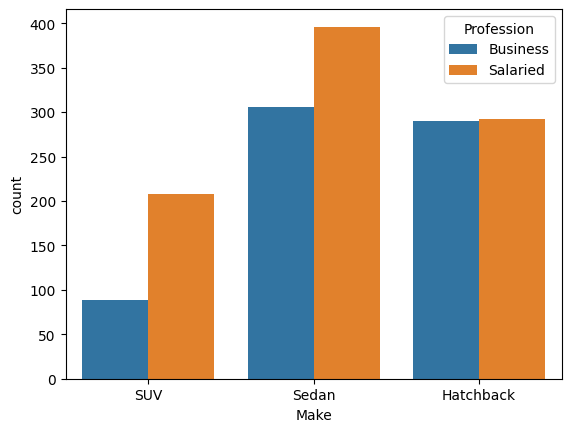

In [101]:
sns.countplot(df, x ="Make", hue = "Profession")

<Axes: xlabel='Profession', ylabel='count'>

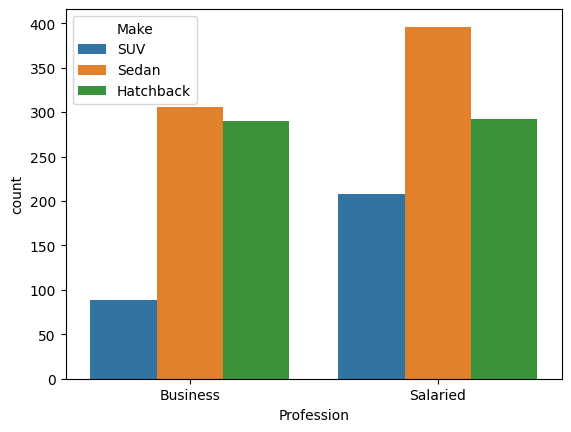

In [102]:
sns.countplot(df,x="Profession", hue="Make")                        # graph not used in report

## E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

In [103]:
e3=df.groupby(["Gender","Profession","Make"])["Make"].count()

In [104]:
e3

Gender  Profession  Make     
Female  Business    SUV           55
                    Sedan         50
        Salaried    Hatchback     15
                    SUV          118
                    Sedan         91
Male    Business    Hatchback    290
                    SUV           34
                    Sedan        256
        Salaried    Hatchback    277
                    SUV           90
                    Sedan        305
Name: Make, dtype: int64

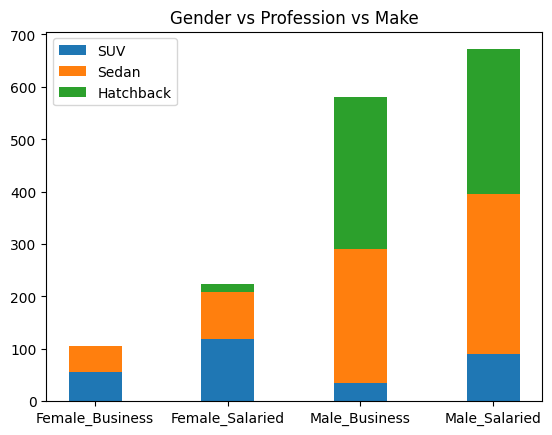

In [105]:
x=["Female_Business","Female_Salaried","Male_Business","Male_Salaried"]
suv=[55,118,34,90]
sedan=[50,91,256,305]
hatchback=[0,15,290,277]
h_b=list(np.add(suv,sedan))
plt.bar(x,suv,0.4,label="SUV")
plt.bar(x,sedan,0.4,bottom=suv,label="Sedan")
plt.bar(x,hatchback,0.4,bottom=h_b,label="Hatchback")
plt.legend()
plt.title("Gender vs Profession vs Make")
plt.show()

<Axes: xlabel='Gender,Profession,Make'>

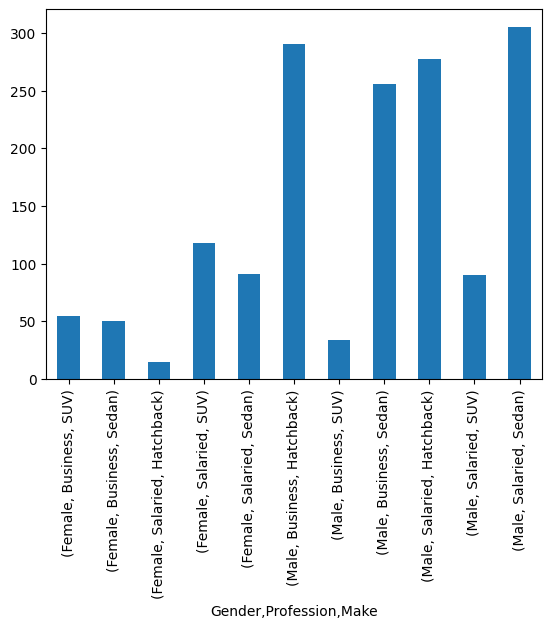

In [106]:
e3.plot.bar(x="Count",y="Make")                        # graph not used in report

<Axes: xlabel='No_of_Dependents', ylabel='count'>

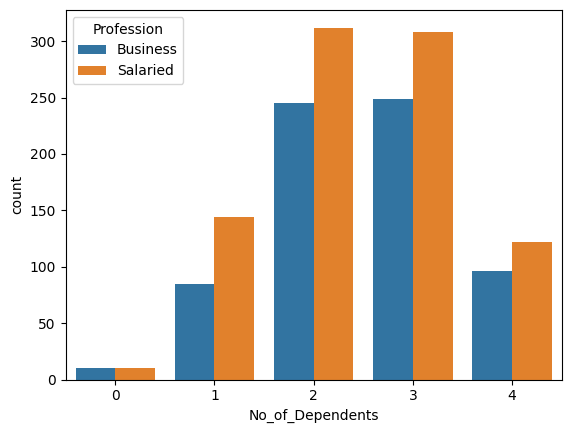

In [107]:
sns.countplot(df, x ="No_of_Dependents", hue = "Profession")                       # graph not used in report

<Axes: xlabel='Profession', ylabel='count'>

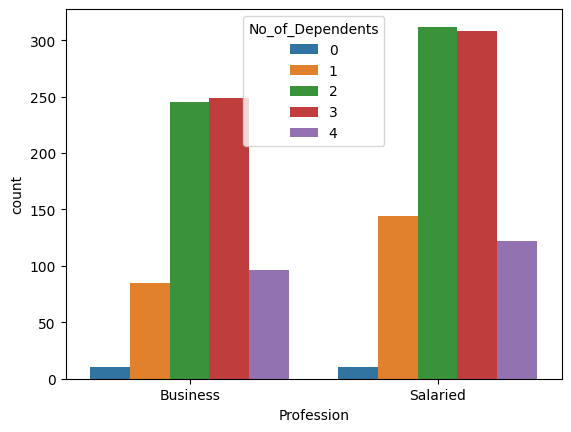

In [108]:
sns.countplot(df, x ="Profession", hue = "No_of_Dependents")                       # graph not used in report

## F1) Gender

In [109]:
tcarF=df.loc[:,["Gender","Make"]]

In [110]:
tcarF1=tcarF.where(tcarF["Gender"]=="Female").dropna()

In [111]:
tcarF2=tcarF1.groupby("Make")["Gender"].count()

In [112]:
dftcarF=pd.DataFrame({"Female":tcarF2})

<Axes: xlabel='Make'>

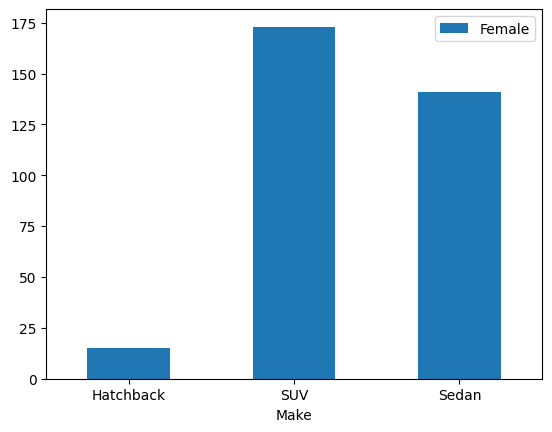

In [113]:
dftcarF.plot.bar(rot=0)

In [114]:
tcarM=df.loc[:,["Gender","Make"]]

In [115]:
tcarM1=tcarM.where(tcarF["Gender"]=="Male").dropna()

In [116]:
tcarM2=tcarM1.groupby("Make")["Gender"].count()

In [117]:
dftcarM=pd.DataFrame({"Male":tcarM2})

<Axes: xlabel='Make'>

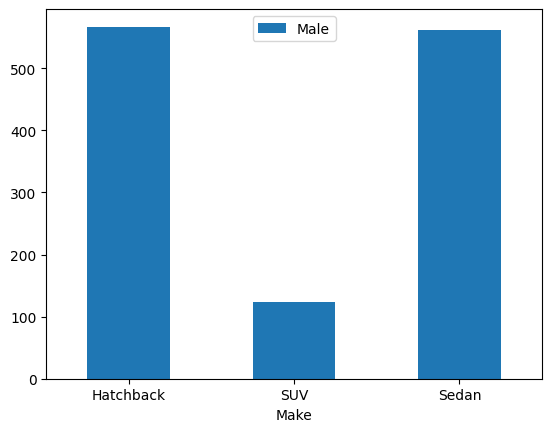

In [118]:
dftcarM.plot.bar(rot=0)

<Axes: xlabel='Make', ylabel='count'>

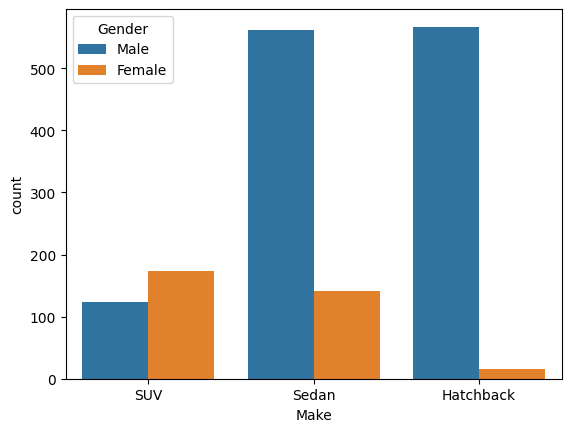

In [119]:
sns.countplot(df, x ="Make", hue = "Gender")                        # graph not used in report

## F2) Personal_loan

In [120]:
loan=df.loc[:,["Personal_loan","Make"]]

In [121]:
loan1=loan.where(loan["Personal_loan"]=="Yes").dropna()

In [122]:
loan2=loan1.groupby("Make")["Personal_loan"].count()

In [123]:
dfloan=pd.DataFrame({"Personal_loan":loan2})

<Axes: xlabel='Make & Personal Loan = Yes'>

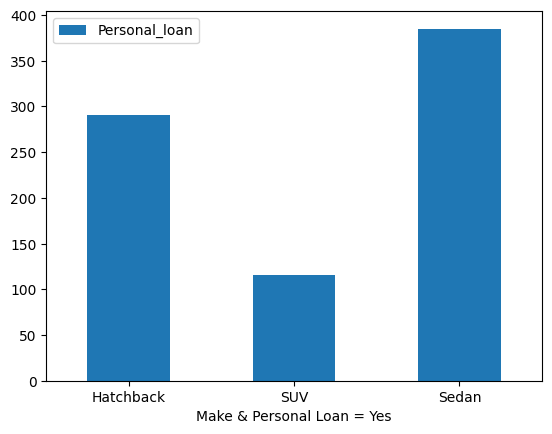

In [124]:
dfloan.plot.bar(rot=0, xlabel = "Make & Personal Loan = Yes")

In [125]:
loan11=df.loc[:,["Personal_loan","Make"]]

In [126]:
loan12=loan11.where(loan["Personal_loan"]=="No").dropna()

In [127]:
loan13=loan12.groupby("Make")["Personal_loan"].count()

In [128]:
dfloan11=pd.DataFrame({"Personal_loan":loan13})

<Axes: xlabel='Make & Personal_loan = No'>

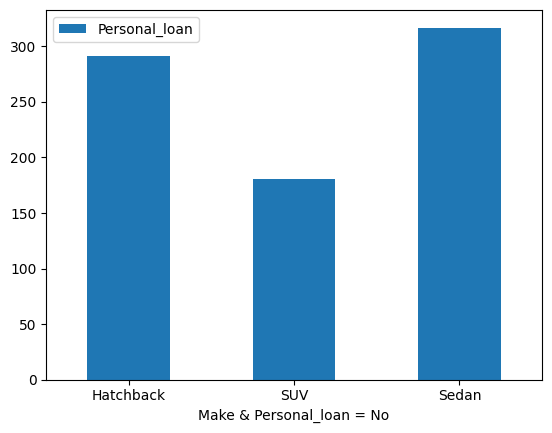

In [129]:
dfloan11.plot.bar(rot=0,xlabel = "Make & Personal_loan = No")

## G: From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

In [130]:
high_price=df[["Make","Price"]]

In [131]:
high_price.groupby(["Make"])["Price"].min()

Make
Hatchback    18000
SUV          31000
Sedan        18000
Name: Price, dtype: int64

In [132]:
high_price.groupby(["Make"])["Price"].max()

Make
Hatchback    33000
SUV          70000
Sedan        55000
Name: Price, dtype: int64

C:\Users\Saurabh Arya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


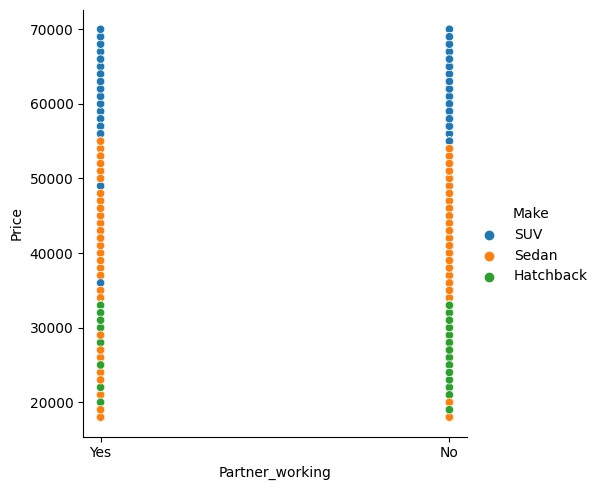

In [133]:
sns.relplot(df, x="Partner_working", y="Price", kind="scatter", hue="Make")

<Axes: xlabel='Make', ylabel='count'>

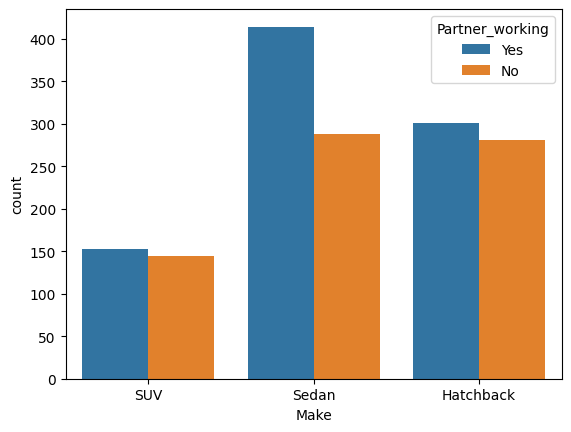

In [134]:
sns.countplot(df,x="Make", hue = "Partner_working")

## H: The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

In [135]:
h1=df.groupby(["Gender","Marital_status","Make"])["Make"].count()

In [136]:
h1

Gender  Marital_status  Make     
Female  Married         Hatchback     14
                        SUV          166
                        Sedan        127
        Single          Hatchback      1
                        SUV            7
                        Sedan         14
Male    Married         Hatchback    484
                        SUV          115
                        Sedan        537
        Single          Hatchback     83
                        SUV            9
                        Sedan         24
Name: Make, dtype: int64

In [137]:
h1/1531*100

Gender  Marital_status  Make     
Female  Married         Hatchback     0.914435
                        SUV          10.842587
                        Sedan         8.295232
        Single          Hatchback     0.065317
                        SUV           0.457218
                        Sedan         0.914435
Male    Married         Hatchback    31.613325
                        SUV           7.511430
                        Sedan        35.075114
        Single          Hatchback     5.421293
                        SUV           0.587851
                        Sedan         1.567603
Name: Make, dtype: float64

<Axes: xlabel='Gender,Marital_status,Make', ylabel='Count'>

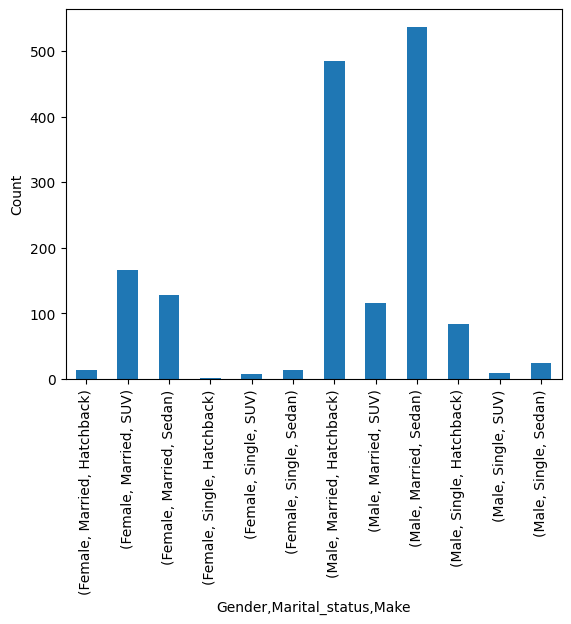

In [138]:
h1.plot.bar(x="Count",y="Make",ylabel = "Count")                       # graph not used in report

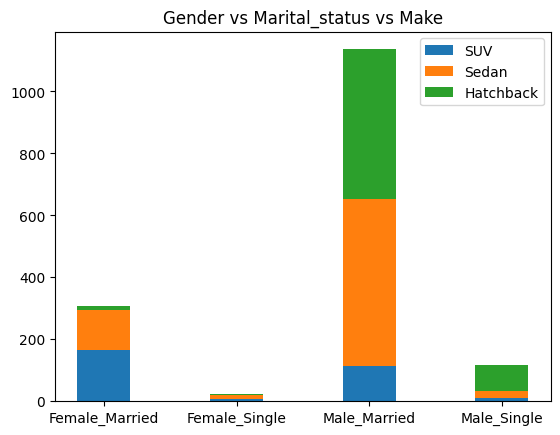

In [139]:
x=["Female_Married","Female_Single","Male_Married","Male_Single"]
suv=[166,7,115,9]
sedan=[127,14,537,24]
hatchback=[14,1,484,83]
h_b=list(np.add(suv,sedan))
plt.bar(x,suv,0.4,label="SUV")
plt.bar(x,sedan,0.4,bottom=suv,label="Sedan")
plt.bar(x,hatchback,0.4,bottom=h_b,label="Hatchback")
plt.legend()
plt.title("Gender vs Marital_status vs Make")
plt.show()

<Axes: xlabel='Marital_status', ylabel='count'>

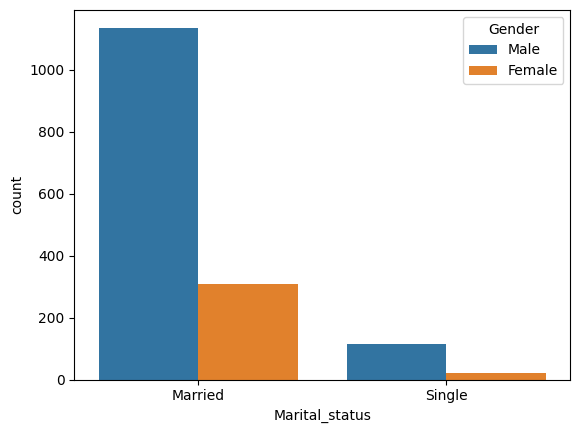

In [140]:
sns.countplot(df,x="Marital_status", hue = "Gender")

In [141]:
h2=df.groupby(["Marital_status","Gender"])["Gender"].count()/1581*100

In [142]:
h2

Marital_status  Gender
Married         Female    19.418090
                Male      71.853257
Single          Female     1.391524
                Male       7.337128
Name: Gender, dtype: float64

<Axes: >

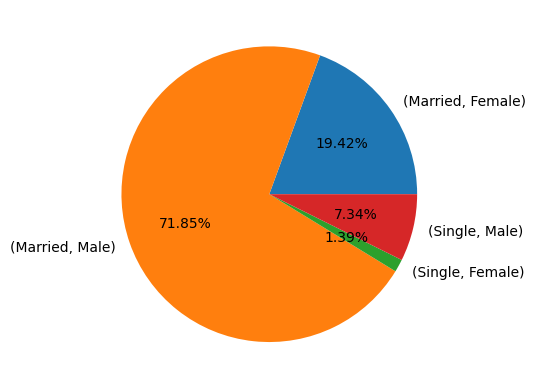

In [143]:
h2.plot.pie(ylabel="", autopct="%2.2f%%")

In [144]:
h3=df.groupby(["Marital_status"])["Gender"].count()/1581*100

In [145]:
h3

Marital_status
Married    91.271347
Single      8.728653
Name: Gender, dtype: float64

In [146]:
h4=df.groupby(["Make"])["Make"].count()/1581*100

In [147]:
h4

Make
Hatchback    36.812144
SUV          18.785579
Sedan        44.402277
Name: Make, dtype: float64

In [148]:
h5=df.groupby(["Gender","Profession","Make"])["Make"].count()

In [149]:
h5

Gender  Profession  Make     
Female  Business    SUV           55
                    Sedan         50
        Salaried    Hatchback     15
                    SUV          118
                    Sedan         91
Male    Business    Hatchback    290
                    SUV           34
                    Sedan        256
        Salaried    Hatchback    277
                    SUV           90
                    Sedan        305
Name: Make, dtype: int64

In [150]:
h5/1581*100

Gender  Profession  Make     
Female  Business    SUV           3.478811
                    Sedan         3.162555
        Salaried    Hatchback     0.948767
                    SUV           7.463631
                    Sedan         5.755851
Male    Business    Hatchback    18.342821
                    SUV           2.150538
                    Sedan        16.192283
        Salaried    Hatchback    17.520557
                    SUV           5.692600
                    Sedan        19.291588
Name: Make, dtype: float64

<Axes: xlabel='Gender,Profession,Make', ylabel='Count'>

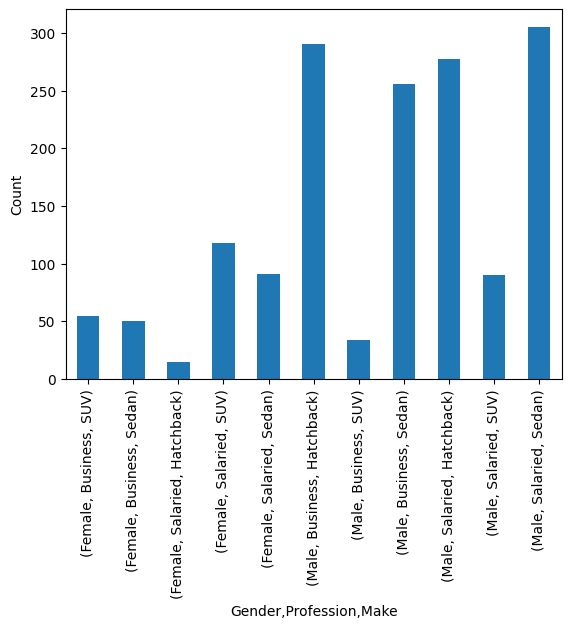

In [151]:
h5.plot.bar(x="Count",y="Gender",ylabel = "Count")

<Axes: >

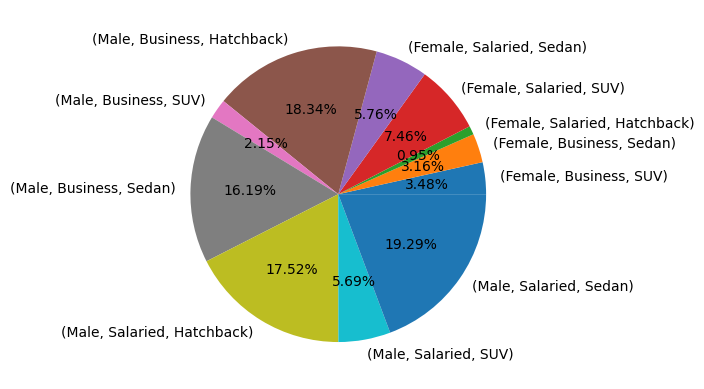

In [152]:
h5.plot.pie(ylabel="", autopct="%2.2f%%")                       # graph not used in report